In [1]:
# Scrap EspnCricInfo Bowlers data website
from bs4 import BeautifulSoup
import requests
import csv
flag=1
def scrapESPN(url,flag):
  p = requests.get(url)
  soup = BeautifulSoup(p.content, 'html.parser')
  content = soup.find_all('tr', class_='data1')
  fields = ['Player',   'Span', 'Mat',  'Inns', 'NO',   'Runs', 'HS',   'Ave',  'BF',   'SR',   '100',  '50',   '0',    '4s',   '6s','']
  itemfull = []
  for item in content:
    items = []
    playerdata=(item.find_all('td'))
    for i in playerdata:
      items.append(i.text)
    itemfull.append(items)
  
  with open("SURYAMatResults.csv", 'a') as csvfile:  
      # creating a csv writer object  
      csvwriter = csv.writer(csvfile)
      if(flag==1):
        csvwriter.writerow(fields)
        flag=0
      csvwriter.writerows(itemfull)

url1 = "https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;"
url2 = ""
url3 = "result=1;result=2;result=3;result=5;template=results;type=batting"
url = url1+url2+url3
flag=1
scrapESPN(url,1)
for i in range(2,20):
  url2 = "page="+str(i)+";"
  url = url1+url2+url3
  print(url)
  scrapESPN(url,0)

https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=2;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=3;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=4;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=reverse;page=5;result=1;result=2;result=3;result=5;template=results;type=batting
https://stats.espncricinfo.com/ci/engine/stats/index.html?class=3;home_or_away=1;home_or_away=2;home_or_away=3;orderby=sixes;orderbyad=r

In [2]:
import pandas as pd
data = pd.read_csv("SURYAMatResults.csv")
df = data.head(30)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


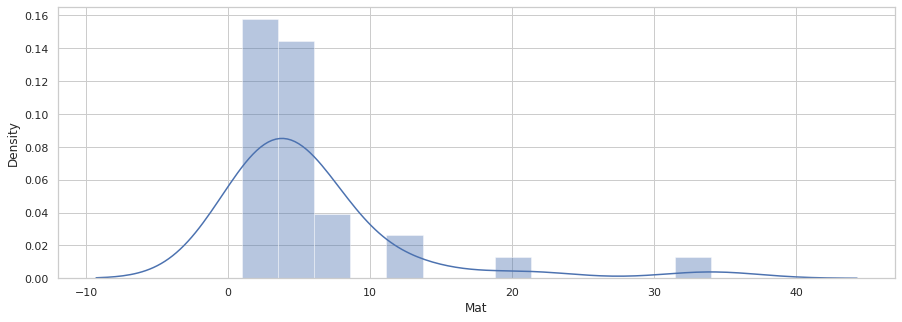

In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
# setting the background style of the plot
sns.set_theme(); np.random.seed(0)
sns.set_style('whitegrid')
a= df.Mat
plt.figure(figsize=(15,5))
x= sns.distplot(a)
plt.show()

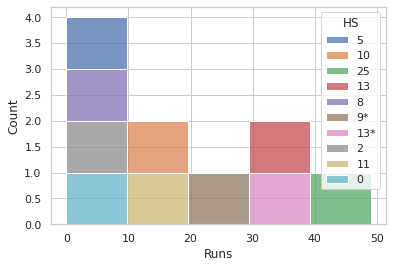

In [5]:
df = data.head(10)
sns.histplot(data=df, x="Runs", hue="HS", multiple="stack")

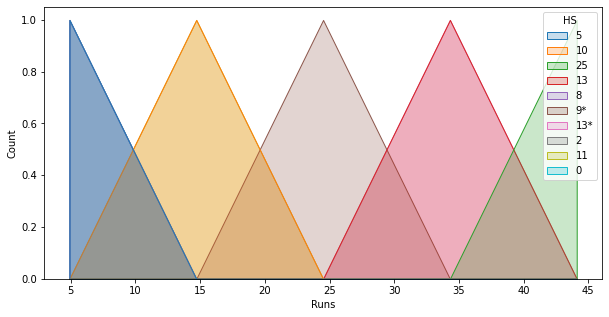

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x="Runs", hue="HS", element="poly")

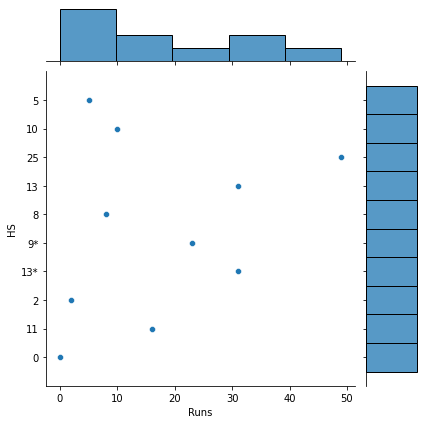

In [ ]:
sns.jointplot(x='Runs', y='HS', data=df)
plt.show()

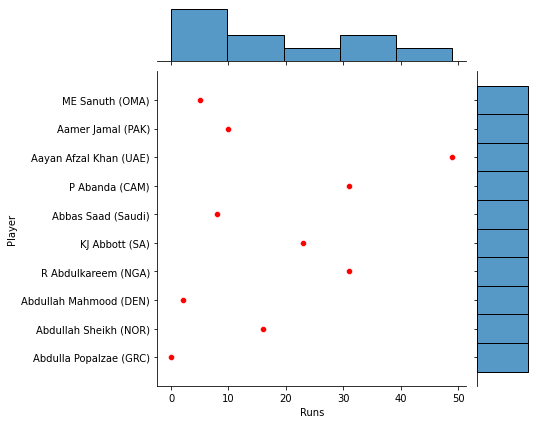

In [ ]:
l=sns.jointplot(data=df,y='Player',x='Runs',joint_kws=dict(color='red'))

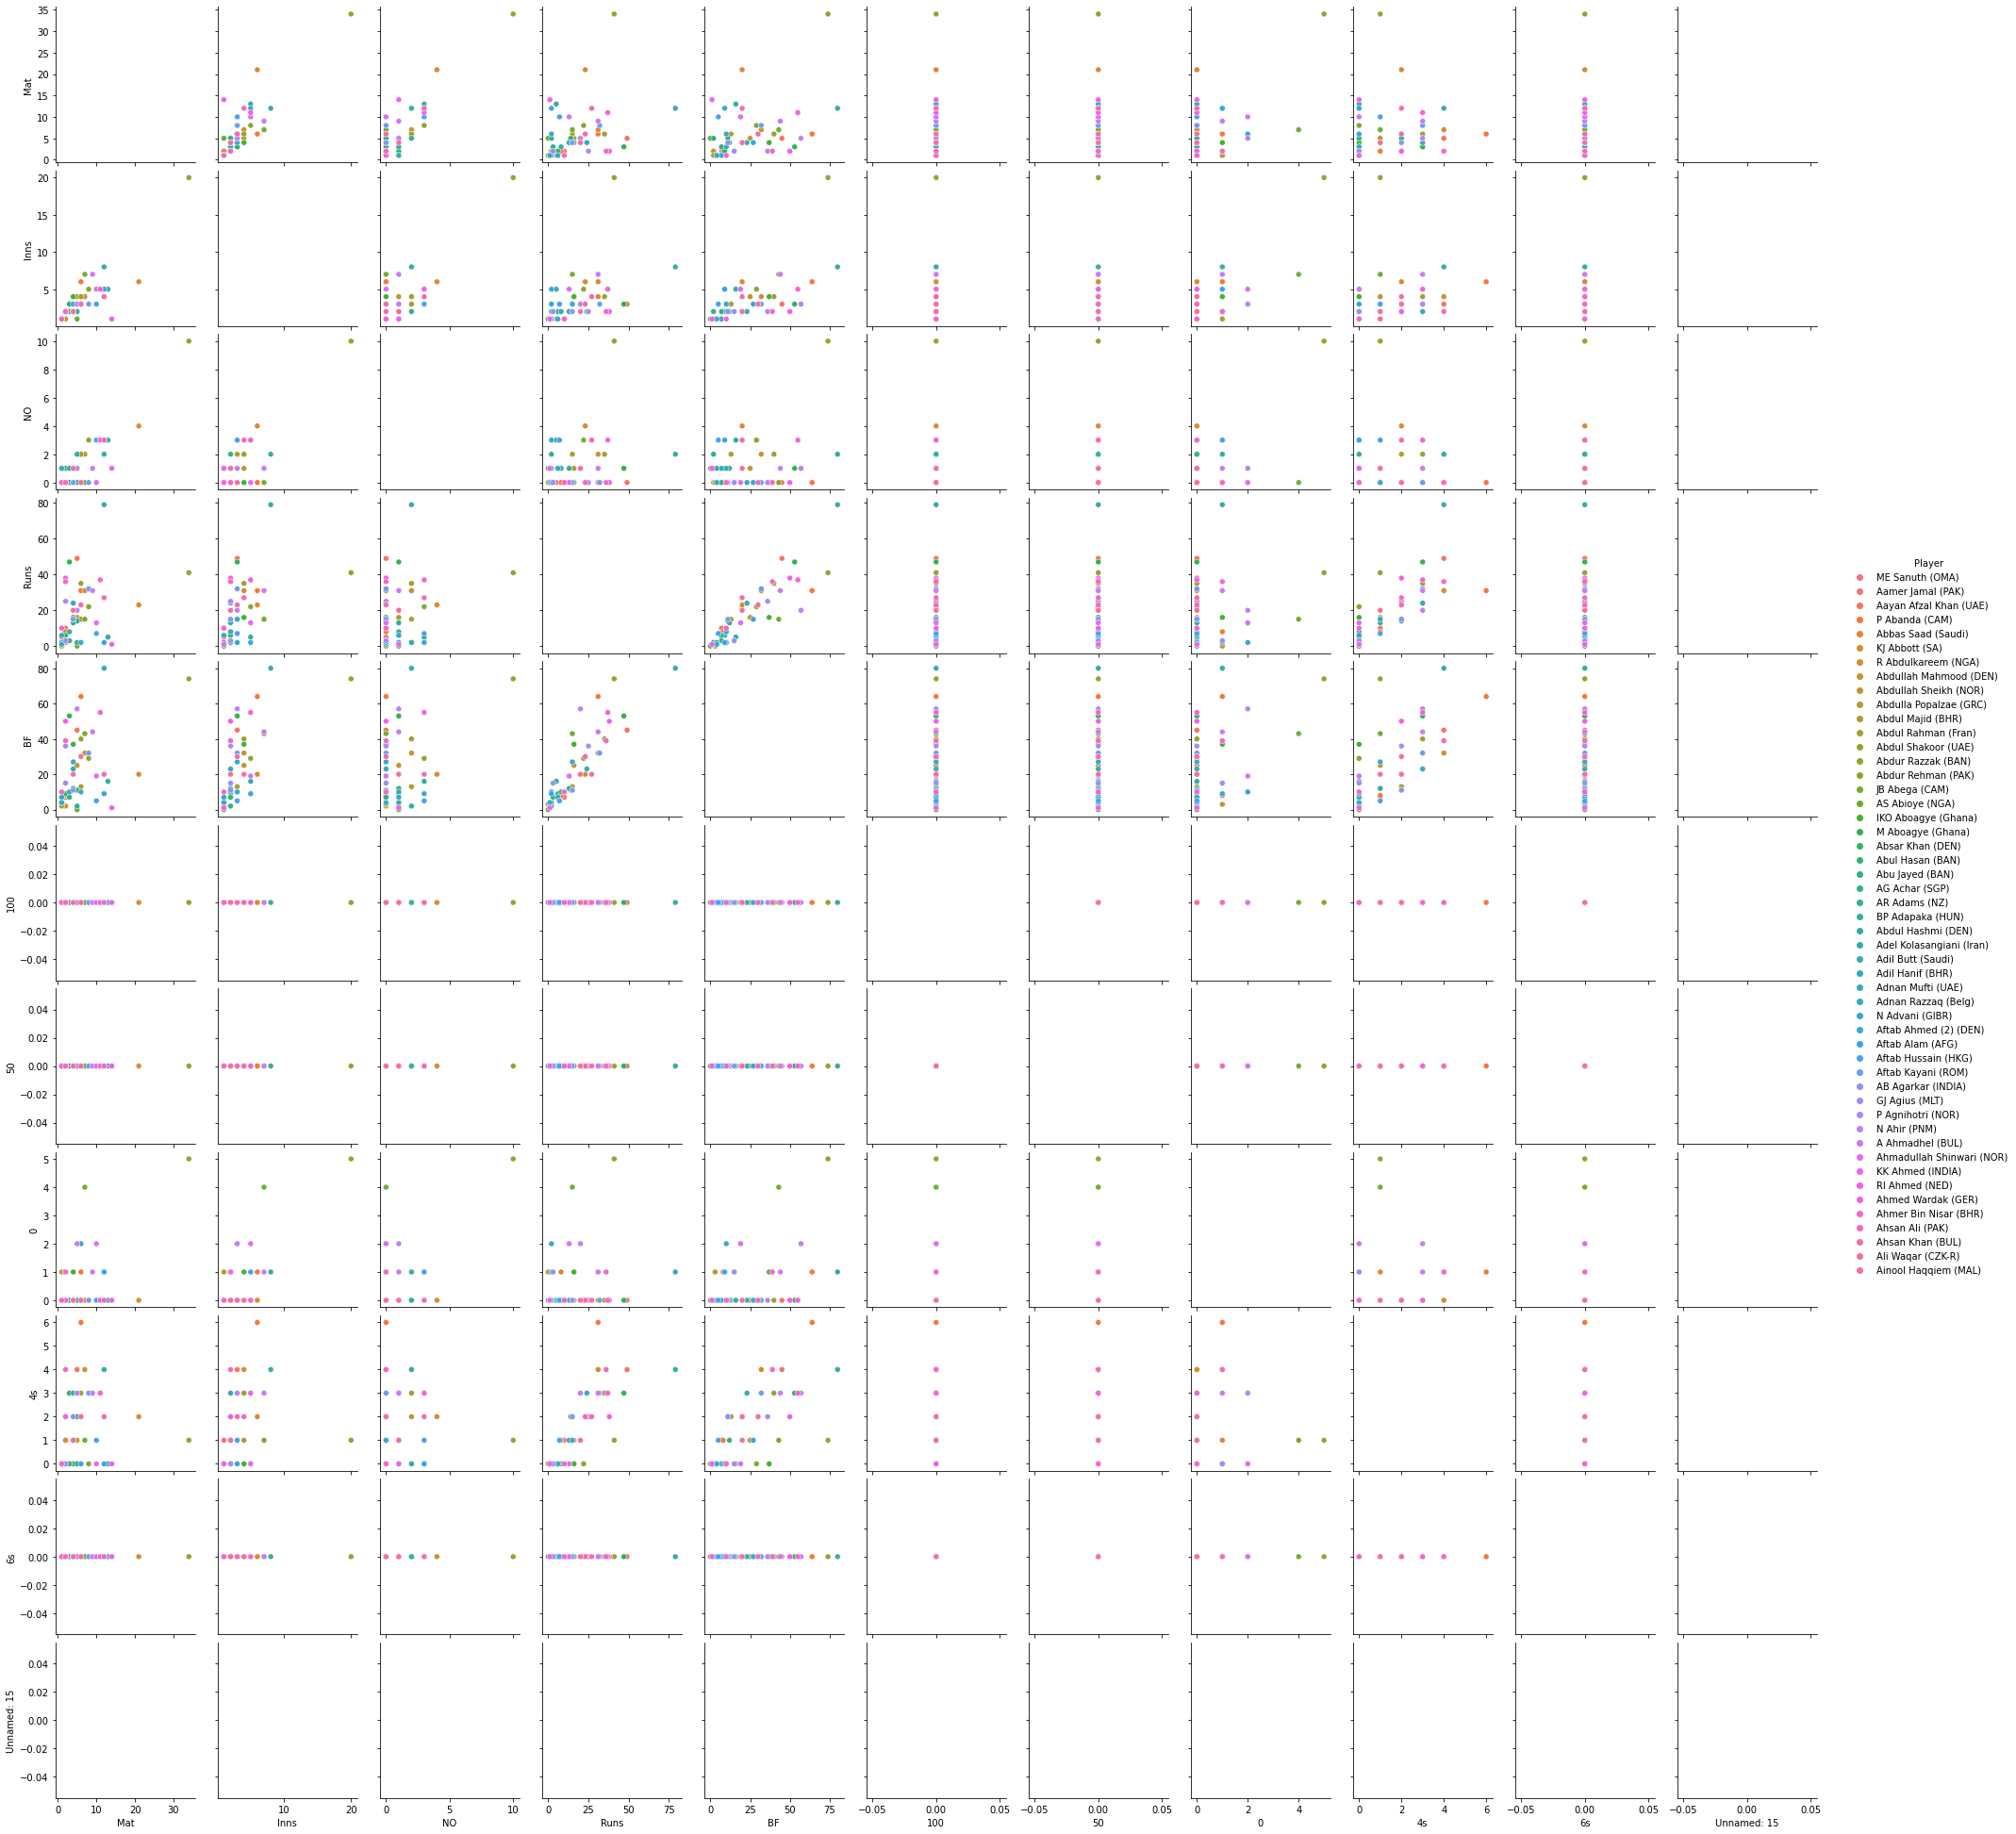

In [ ]:
df = data.head(50)
sns.pairplot(df, hue ='Player')
plt.show()

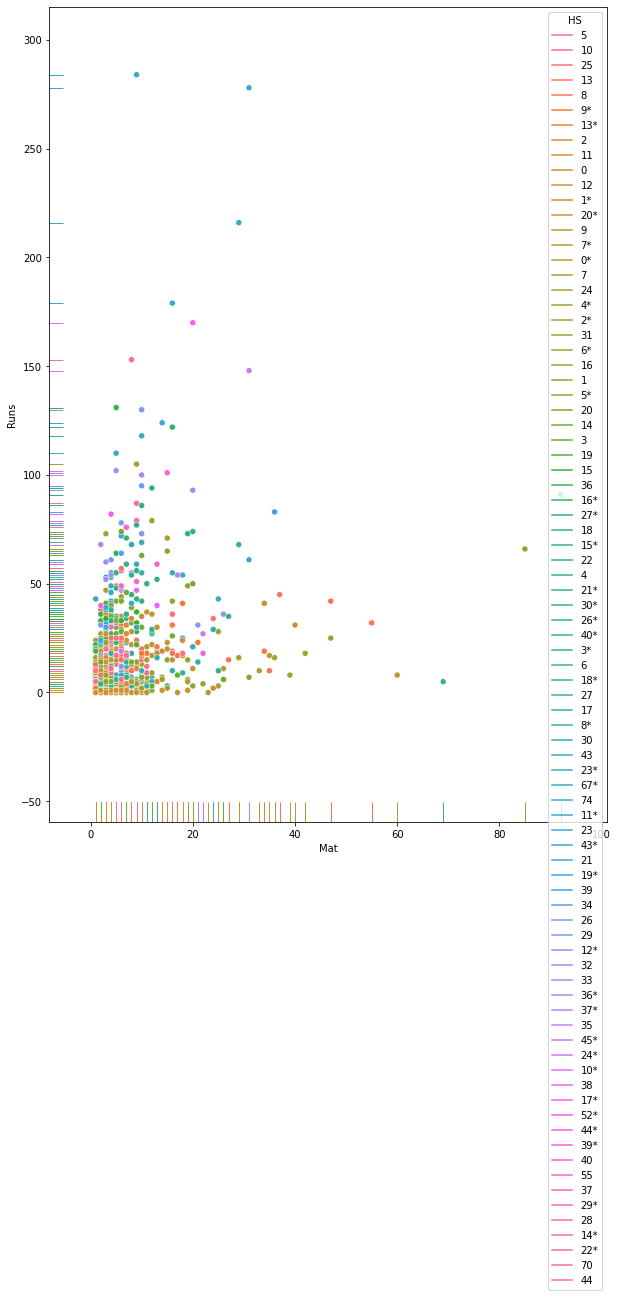

In [ ]:
plt.figure(figsize=(10,15))
sns.scatterplot(data=data, y ="Runs", x ="Mat",hue ="HS")
sns.rugplot(data=data, y ="Runs", x ="Mat",hue ="HS")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


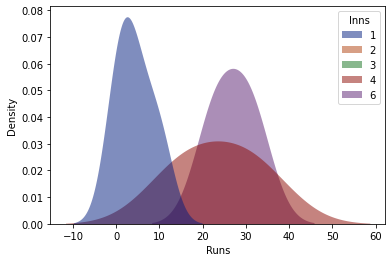

In [ ]:
sns.kdeplot( data=df, x="Runs", hue="Inns",fill=True, common_norm=False, 
palette="dark",alpha=.5, linewidth=0,)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


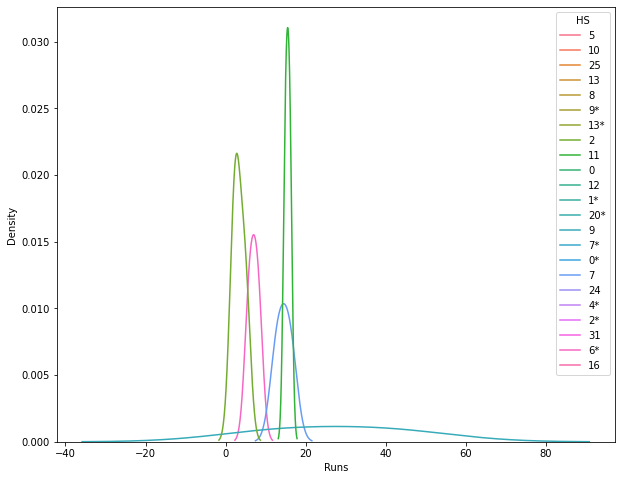

In [ ]:
plt.figure(figsize=(10,8))
df = data.head(30)
sns.kdeplot(data=df,x="Runs",hue='HS')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


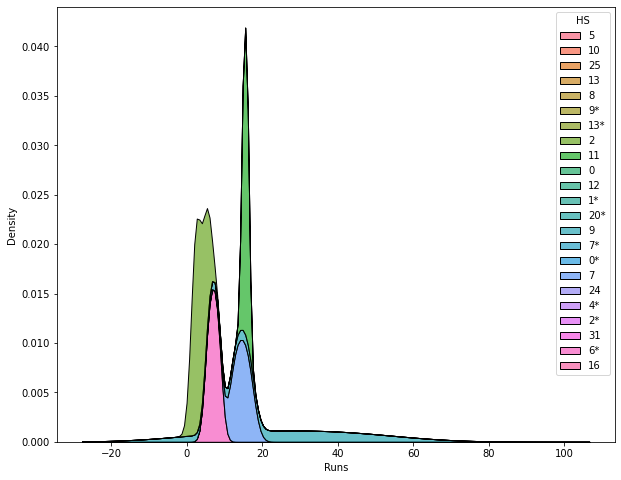

In [ ]:
plt.figure(figsize=(10,8))
df = data.head(30)
sns.kdeplot(data=df,x='Runs',hue='HS',multiple='stack')
plt.show()